In [1]:
# Importing core packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# ML tools
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, matthews_corrcoef, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/w2087133/Documents/my_cleaneddata.csv")
df.head()

,Year of birth of woman,Ever attended school,Highest level of school attended,Covered by health insurance,Age,Own a mobile phone,Ever given birth,Ever had child who later died,Received prenatal care,Blood pressure,Place of delivery,Geopolitical zone,Education
0,1987,1,41,2,4,1,1,2,1,1,31,4,4
1,1986,1,41,2,5,1,1,2,1,1,31,4,4
2,1984,1,41,2,5,1,1,1,1,1,23,4,4
3,1989,1,41,2,4,1,1,2,1,1,31,4,4
4,1985,1,31,2,5,1,1,2,1,1,31,4,3


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Year of birth of woman            5148 non-null   int64
 1   Ever attended school              5148 non-null   int64
 2   Highest level of school attended  5148 non-null   int64
 3   Covered by health insurance       5148 non-null   int64
 4   Age                               5148 non-null   int64
 5   Own a mobile phone                5148 non-null   int64
 6   Ever given birth                  5148 non-null   int64
 7   Ever had child who later died     5148 non-null   int64
 8   Received prenatal care            5148 non-null   int64
 9   Blood pressure                    5148 non-null   int64
 10  Place of delivery                 5148 non-null   int64
 11  Geopolitical zone                 5148 non-null   int64
 12  Education                         

,Year of birth of woman,Ever attended school,Highest level of school attended,Covered by health insurance,Age,Own a mobile phone,Ever given birth,Ever had child who later died,Received prenatal care,Blood pressure,Place of delivery,Geopolitical zone,Education
count,5148.000000,5148.0,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.0,5148.000000,5148.000000,5148.000000,5148.000000
mean,2004.289821,1.0,26.403458,1.987762,3.447552,1.310023,1.000777,1.807110,1.0,1.049728,22.771756,3.364802,2.539821
std,315.461686,0.0,10.239952,0.455996,1.335271,0.462548,0.027867,0.394606,0.0,0.262725,12.145808,1.745009,1.021703
min,1972.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,11.000000,1.000000,0.000000
25%,1987.000000,1.0,21.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.0,1.000000,12.000000,2.000000,2.000000
50%,1992.000000,1.0,31.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.0,1.000000,23.000000,3.000000,3.000000
75%,1997.000000,1.0,31.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.0,1.000000,23.000000,5.000000,3.000000
max,9998.000000,1.0,99.000000,9.000000,7.000000,2.000000,2.000000,2.000000,1.0,9.000000,99.000000,6.000000,9.000000


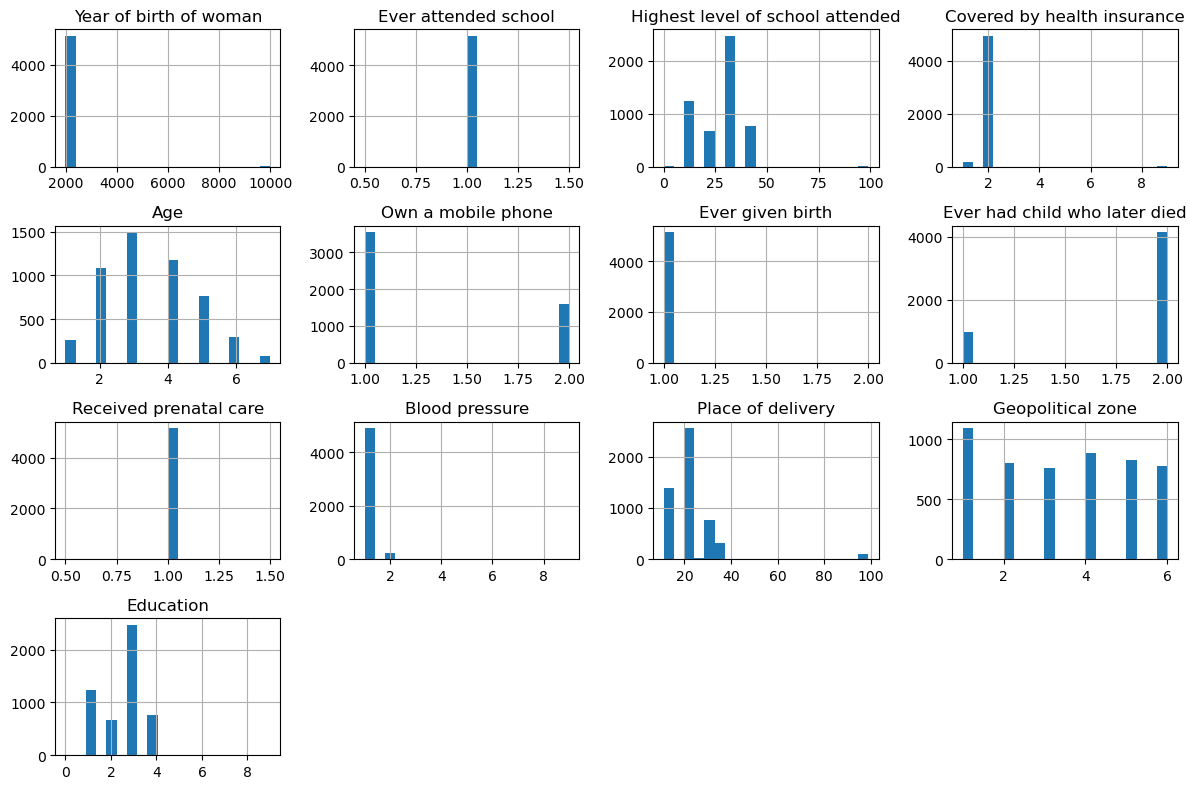

In [4]:
# Histogram to see data distribution
df.hist(figsize=(12, 8), bins=20)    
plt.tight_layout()
plt.show()

In [5]:
# recoding place of delivery
def recode_delivery(place):
    if place == 11:                          # Home
        return "Home"
    elif place in [21, 22, 23, 26]:            # Public health facility
        return "Public health facility"
    elif place in [31, 32, 33, 36]:            # Private health facility
        return "Private health facility"
    elif place == 76:                          # Don't know
        return "Don't know"
    else:
        return "Unknown"                              # unknown or invalid

# Apply the function
df['Place of delivery (recode)'] = df['Place of delivery'].apply(recode_delivery)

In [6]:
# Create a dictionary to map codes to age group labels
age_group_map = {
    1: "15–19",
    2: "20–24",
    3: "25–29",
    4: "30–34",
    5: "35–39",
    6: "40–44",
    7: "45–49"
}

# Apply the mapping to your Age column
df['Age group'] = df['Age'].map(age_group_map)

In [7]:
# recoding Geopolitical zone
def recode_geozone(place):
    if place == 1:                          
        return "North Central"
    elif place == 2:            
        return "North East"
    elif place == 3:            
        return "North West"
    elif place == 4:
        return "South East"
    elif place == 5:                          
        return "South South"
    else:
        return "South West"                              

# Apply the function
df['Geopolitical zone (recode)'] = df['Geopolitical zone'].apply(recode_geozone)

In [8]:
def Ever_had_child_who_later_died(x):
    if x == 2: 
        return 0
    else:
        return 1



df['Ever had child who later died'] = df['Ever had child who later died'].apply(Ever_had_child_who_later_died)

In [9]:
def Received_prenatal_care(x):
    if x == 2: 
        return 0
    else:
        return 1



df['Received prenatal care'] = df['Received prenatal care'].apply(Received_prenatal_care)

In [10]:
def Covered_by_health_insurance(x):
    if x == 2: 
        return 0
    elif x == 9:
        return 9
    else:
        return 1
    


df['Covered by health insurance'] = df['Covered by health insurance'].apply(Covered_by_health_insurance)

In [11]:
def Blood_pressure(x):
    if x == 2: 
        return 0
    else:
        return 1
    



df['Blood pressure'] = df['Blood pressure'].apply(Blood_pressure)

In [12]:
def Own_a_mobile_phone(x):
    if x == 2: 
        return 0
    else:
        return 1
    



df['Own a mobile phone'] = df['Own a mobile phone'].apply(Own_a_mobile_phone)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year of birth of woman            5148 non-null   int64 
 1   Ever attended school              5148 non-null   int64 
 2   Highest level of school attended  5148 non-null   int64 
 3   Covered by health insurance       5148 non-null   int64 
 4   Age                               5148 non-null   int64 
 5   Own a mobile phone                5148 non-null   int64 
 6   Ever given birth                  5148 non-null   int64 
 7   Ever had child who later died     5148 non-null   int64 
 8   Received prenatal care            5148 non-null   int64 
 9   Blood pressure                    5148 non-null   int64 
 10  Place of delivery                 5148 non-null   int64 
 11  Geopolitical zone                 5148 non-null   int64 
 12  Education           

In [14]:
# 1. Descriptive stats for variables
Variables = ['Ever attended school', 'Covered by health insurance', 'Age group', 'Own a mobile phone', 'Ever had child who later died',
               'Received prenatal care', 'Blood pressure', 'Place of delivery (recode)', 'Geopolitical zone (recode)', 'Education']

for col in Variables:
    print(f"\n{col.upper()} Distribution:")
    print(df[col].value_counts(normalize=True) * 100)


EVER ATTENDED SCHOOL Distribution:
Ever attended school
1    100.0
Name: proportion, dtype: float64

COVERED BY HEALTH INSURANCE Distribution:
Covered by health insurance
0    95.979021
1     3.671329
9     0.349650
Name: proportion, dtype: float64

AGE GROUP Distribution:
Age group
25–29    29.079254
30–34    22.766123
20–24    21.017871
35–39    14.957265
40–44     5.788656
15–19     4.972805
45–49     1.418026
Name: proportion, dtype: float64

OWN A MOBILE PHONE Distribution:
Own a mobile phone
1    68.997669
0    31.002331
Name: proportion, dtype: float64

EVER HAD CHILD WHO LATER DIED Distribution:
Ever had child who later died
0    80.710956
1    19.289044
Name: proportion, dtype: float64

RECEIVED PRENATAL CARE Distribution:
Received prenatal care
1    100.0
Name: proportion, dtype: float64

BLOOD PRESSURE Distribution:
Blood pressure
1    95.337995
0     4.662005
Name: proportion, dtype: float64

PLACE OF DELIVERY (RECODE) Distribution:
Place of delivery (recode)
Public health


EVER ATTENDED SCHOOL Distribution:
Ever attended school
1    100.0
Name: proportion, dtype: float64


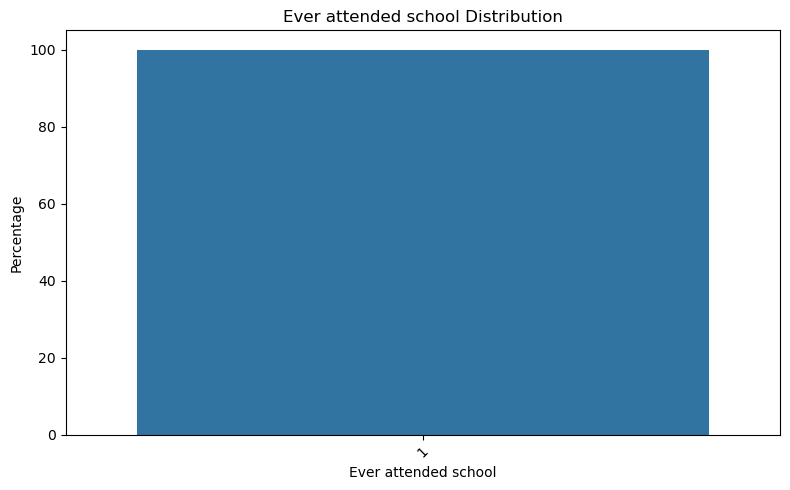


COVERED BY HEALTH INSURANCE Distribution:
Covered by health insurance
0    95.98
1     3.67
9     0.35
Name: proportion, dtype: float64


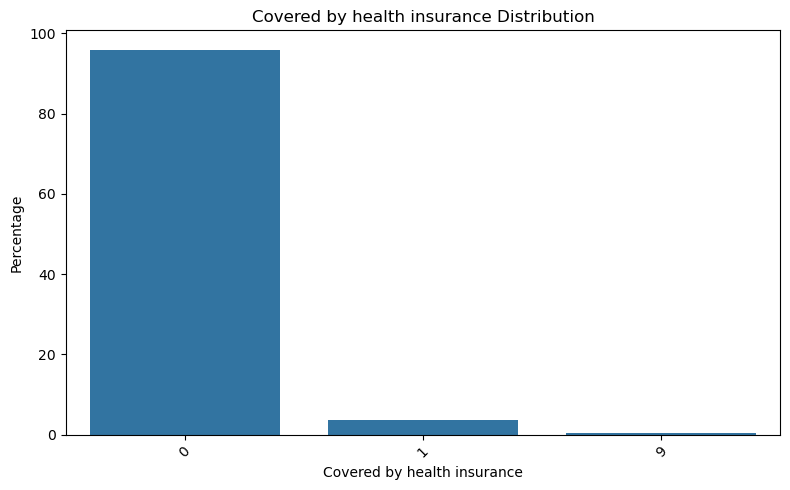


AGE GROUP Distribution:
Age group
25–29    29.08
30–34    22.77
20–24    21.02
35–39    14.96
40–44     5.79
15–19     4.97
45–49     1.42
Name: proportion, dtype: float64


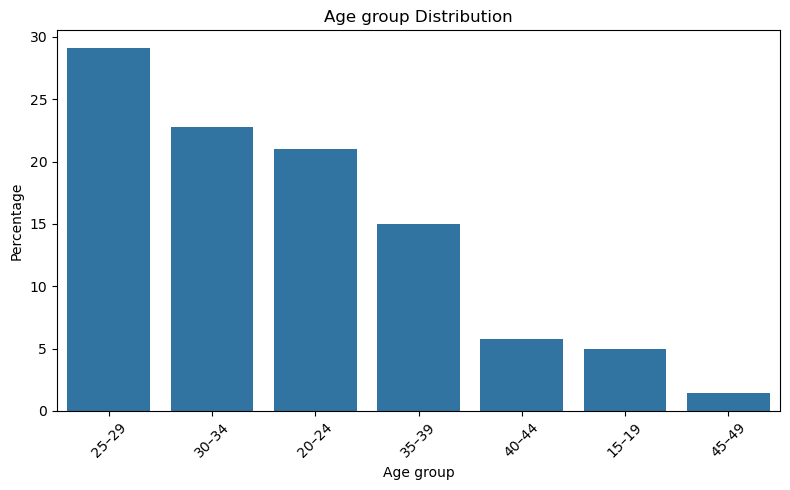


OWN A MOBILE PHONE Distribution:
Own a mobile phone
1    69.0
0    31.0
Name: proportion, dtype: float64


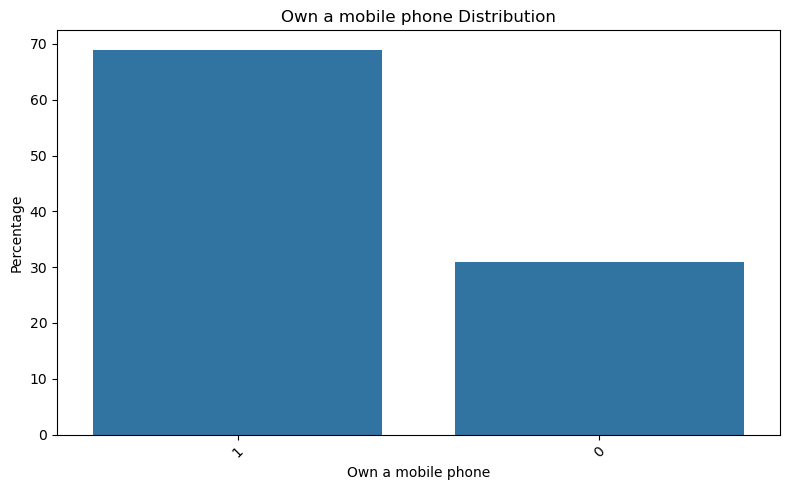


EVER HAD CHILD WHO LATER DIED Distribution:
Ever had child who later died
0    80.71
1    19.29
Name: proportion, dtype: float64


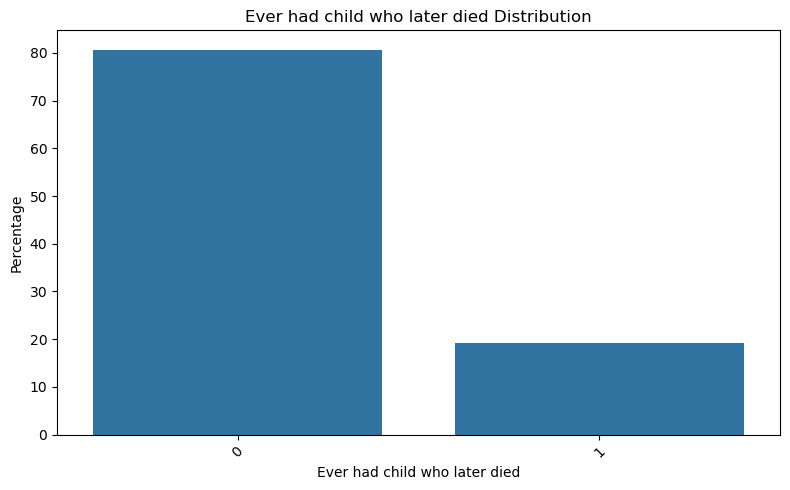


RECEIVED PRENATAL CARE Distribution:
Received prenatal care
1    100.0
Name: proportion, dtype: float64


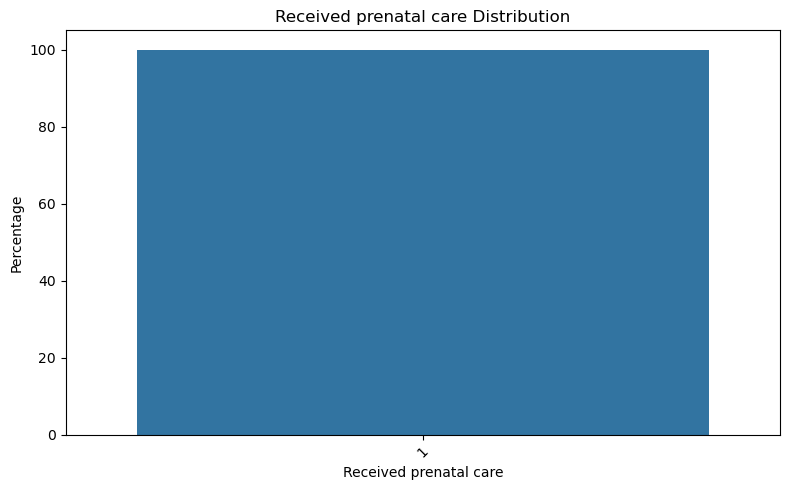


BLOOD PRESSURE Distribution:
Blood pressure
1    95.34
0     4.66
Name: proportion, dtype: float64


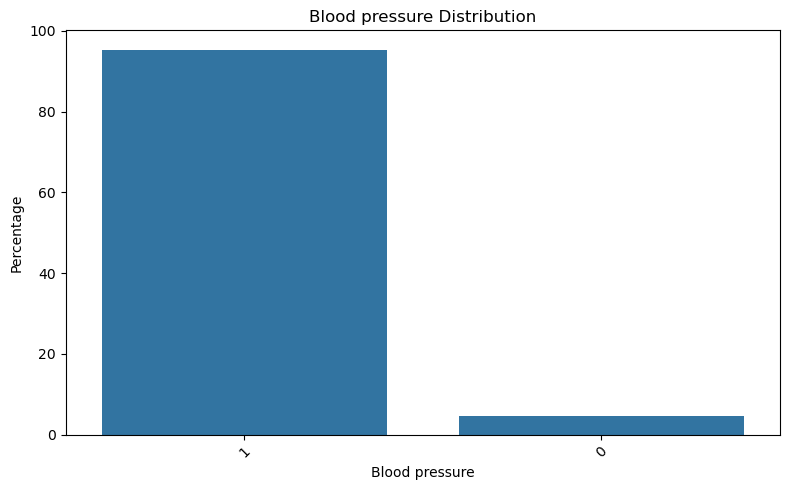


PLACE OF DELIVERY (RECODE) Distribution:
Place of delivery (recode)
Public health facility     50.23
Home                       21.27
Private health facility    21.02
Unknown                     7.44
Don't know                  0.04
Name: proportion, dtype: float64


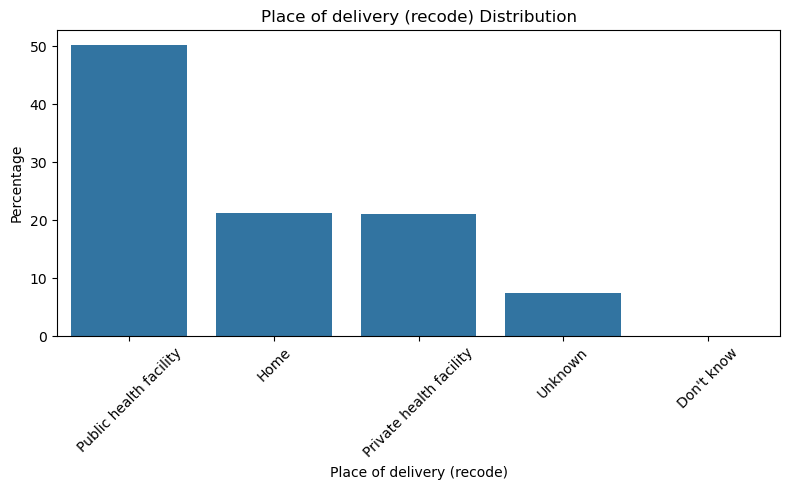


GEOPOLITICAL ZONE (RECODE) Distribution:
Geopolitical zone (recode)
North Central    21.21
South East       17.15
South South      16.06
North East       15.66
South West       15.09
North West       14.82
Name: proportion, dtype: float64


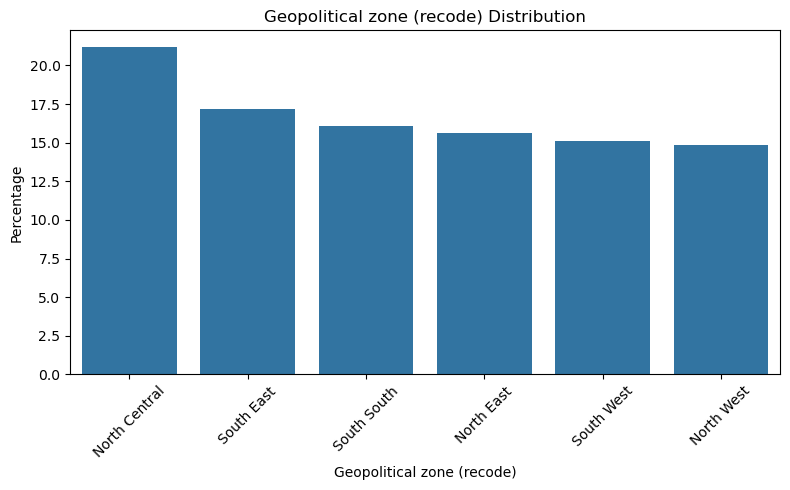


EDUCATION Distribution:
Education
3    48.08
1    23.93
4    14.84
2    13.05
0     0.06
9     0.04
Name: proportion, dtype: float64


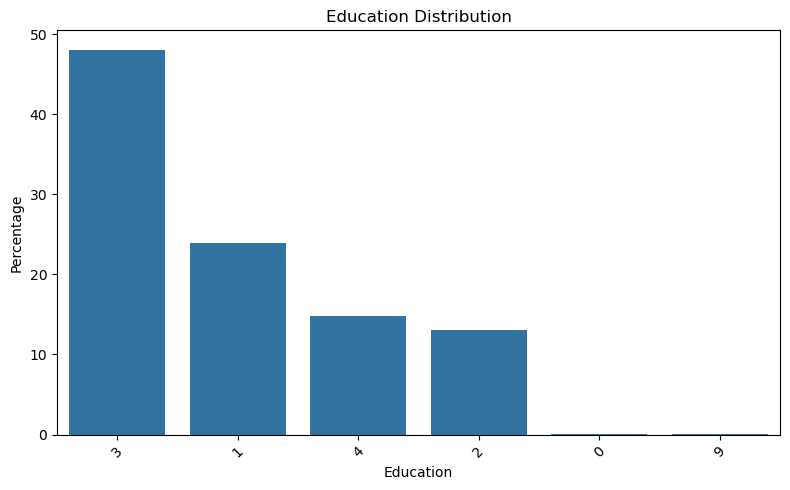

In [15]:
# A histogram for each variable, cannot get
for col in Variables:
    print(f"\n{col.upper()} Distribution:")
    dist = df[col].value_counts(normalize=True) * 100
    print(dist.round(2))

    # Plot histogram (bar chart for categories)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=dist.index.astype(str), y=dist.values)
    plt.title(f"{col} Distribution")
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
df['Education'].unique()

array([4, 3, 2, 1, 9, 0], dtype=int64)

In [17]:
# Remove rows with unknown education before applying high_risk 
df = df[df['Education'] != 9]

In [18]:
df['Education'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [19]:
df.columns

Index(['Year of birth of woman', 'Ever attended school',
       'Highest level of school attended', 'Covered by health insurance',
       'Age', 'Own a mobile phone', 'Ever given birth',
       'Ever had child who later died', 'Received prenatal care',
       'Blood pressure', 'Place of delivery', 'Geopolitical zone', 'Education',
       'Place of delivery (recode)', 'Age group',
       'Geopolitical zone (recode)'],
      dtype='object')

In [20]:
df['high_risk'] = (
    (df['Ever had child who later died'] == 1) |  # 1 = yes, 0 = no
    (df['Received prenatal care'] == 0) |  # 1 = yes, 0 = no, 9 = no response
    (df['Covered by health insurance'] == 0) |  # 1 = yes, 0 = no and 9 = no response
    (df['Place of delivery (recode)'] == "Home") |  # 1 = home, 2=public, 3=private, 4=dk, 0=other
    (df['Blood pressure'] == 0) |  #1 = yes, 2 = no
    (df['Own a mobile phone'] == 0) |  # 1 = yes, 0 = no, 9 = no response
    (df['Education'] < 3) |  # Low education level
    (df['Age group'].isin(['15–19', '35–39', '40–44', '45–49'])) # not all age groups are included for specific reasons, can recode if there's a need to
).astype(int)

In [21]:
df['high_risk'].value_counts()

high_risk
1    5061
0      85
Name: count, dtype: int64

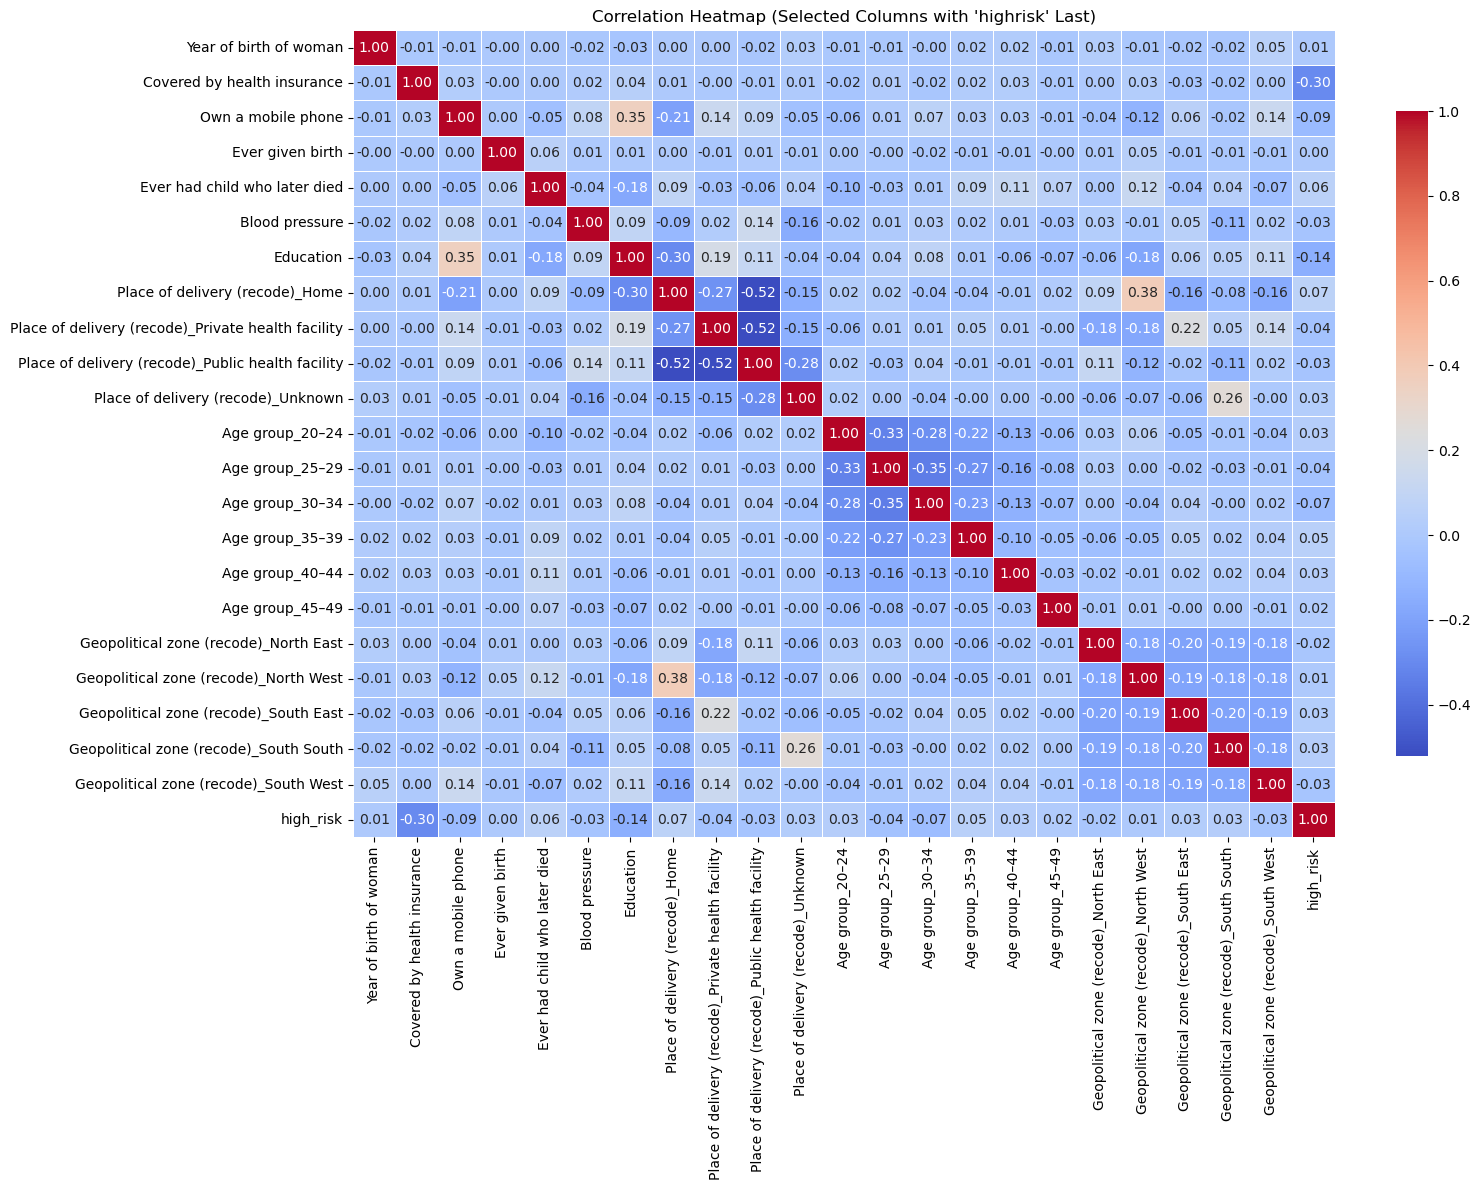

In [22]:
# One-Hot Encode categorical variables (excluding numeric columns)
df_encoded = pd.get_dummies(df, drop_first=True)

# Exclude the columns you don't want in the correlation matrix
columns_to_exclude = ['Ever attended school', 'Highest level of school attended', 'Age', 'Received prenatal care',
                      'Place of delivery', 'Geopolitical zone']  

# Drop the excluded columns from the encoded dataframe
df_cleaned = df_encoded.drop(columns=columns_to_exclude)

# Move the 'highrisk' column to the last position
columns = [col for col in df_cleaned.columns if col != 'high_risk'] + ['high_risk']
df_cleaned = df_cleaned[columns]

# Generate the correlation matrix with the cleaned dataframe
corr_cleaned = df_cleaned.corr()

# Generate the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 10}, linewidths=0.5)


plt.title("Correlation Heatmap (Selected Columns with 'highrisk' Last)")
plt.tight_layout()  # Avoid label overlap
plt.show()

In [23]:
df['Received prenatal care'].value_counts(dropna=False)

Received prenatal care
1    5146
Name: count, dtype: int64

In [24]:
df.columns

Index(['Year of birth of woman', 'Ever attended school',
       'Highest level of school attended', 'Covered by health insurance',
       'Age', 'Own a mobile phone', 'Ever given birth',
       'Ever had child who later died', 'Received prenatal care',
       'Blood pressure', 'Place of delivery', 'Geopolitical zone', 'Education',
       'Place of delivery (recode)', 'Age group', 'Geopolitical zone (recode)',
       'high_risk'],
      dtype='object')

In [25]:
X = df.drop(['high_risk', 'Year of birth of woman', 'Ever attended school', 'Highest level of school attended', 'Age', 'Received prenatal care',
                      'Place of delivery', 'Geopolitical zone'], axis=1)
y = df['high_risk']

In [26]:
#One-Hot Encode categorical variables (excluding numeric columns)
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure the target variable is numeric
y = y.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model 1 - without handling class imbalance
log_model_no = LogisticRegression(max_iter=1000)  
log_model_no.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_no = log_model_no.predict(X_test)

# Print model performance metrics
print("Logistic Regression - Train/Test Split")
print("Class weight = no balance")
print("Accuracy:", accuracy_score(y_test, y_pred_no))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no))
print("Classification Report:\n", classification_report(y_test, y_pred_no))
print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred_no))
print()

# Model 2 - handling class imbalance
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')  
log_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_model.predict(X_test)

# Print model performance metrics
print("Logistic Regression - Train/Test Split")
print("Classweight = balanced")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))

Logistic Regression - Train/Test Split
Class weight = no balance
Accuracy: 0.9844660194174757
Confusion Matrix:
 [[   2   14]
 [   2 1012]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.99      1.00      0.99      1014

    accuracy                           0.98      1030
   macro avg       0.74      0.56      0.60      1030
weighted avg       0.98      0.98      0.98      1030

Matthews Correlation Coefficient (MCC): 0.24461207521668873

Logistic Regression - Train/Test Split
Classweight = balanced
Accuracy: 0.9941747572815534
Confusion Matrix:
 [[  15    1]
 [   5 1009]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       1.00      1.00      1.00      1014

    accuracy                           0.99      1030
   macro avg       0.87      0.97      0.92      1030
weighted avg   

In [27]:
#10-fold cross-validation

# Scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'mcc': make_scorer(matthews_corrcoef)
}

# Model 1: Without class_weight
log_no_balance = LogisticRegression(max_iter=1000)
results_no_balance = cross_validate(log_no_balance, X_encoded, y, cv=10, scoring=scoring)

# Model 2: With class_weight='balanced'
log_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
results_balanced = cross_validate(log_balanced, X_encoded, y, cv=10, scoring=scoring)

# Compare average metrics
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Without Balancing': [
        results_no_balance['test_accuracy'].mean(),
        results_no_balance['test_precision'].mean(),
        results_no_balance['test_recall'].mean(),
        results_no_balance['test_f1'].mean(),
        results_no_balance['test_mcc'].mean()
    ],
    'With Balancing': [
        results_balanced['test_accuracy'].mean(),
        results_balanced['test_precision'].mean(),
        results_balanced['test_recall'].mean(),
        results_balanced['test_f1'].mean(),
        results_balanced['test_mcc'].mean()
    ]
})

# Show comparison table
print(comparison)

      Metric  Without Balancing  With Balancing
0   Accuracy           0.982317        0.994949
1  Precision           0.984218        0.999803
2     Recall           0.998024        0.995059
3   F1 Score           0.991072        0.997420
4        MCC           0.089171        0.883643


In [28]:
# Model 1: Random Forest without class_weight
rf_no = RandomForestClassifier(random_state=42)
rf_no.fit(X_train, y_train)
y_pred_no = rf_no.predict(X_test)

print("Random Forest - Train/test split")
print()
print("No class_weight")
print("Accuracy:", accuracy_score(y_test, y_pred_no))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no))
print("Classification Report:\n", classification_report(y_test, y_pred_no))
print("MCC:", matthews_corrcoef(y_test, y_pred_no))
print()

# Model 2: Random Forest with class_weight='balanced'
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_bal.fit(X_train, y_train)
y_pred_bal = rf_bal.predict(X_test)

print("Class_weight = balanced")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_bal))
print("MCC:", matthews_corrcoef(y_test, y_pred_bal))

Random Forest - Train/test split

No class_weight
Accuracy: 0.9970873786407767
Confusion Matrix:
 [[  15    1]
 [   2 1012]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       1.00      1.00      1.00      1014

    accuracy                           1.00      1030
   macro avg       0.94      0.97      0.95      1030
weighted avg       1.00      1.00      1.00      1030

MCC: 0.908042961217396

Class_weight = balanced
Accuracy: 0.9970873786407767
Confusion Matrix:
 [[  14    2]
 [   1 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       1.00      1.00      1.00      1014

    accuracy                           1.00      1030
   macro avg       0.97      0.94      0.95      1030
weighted avg       1.00      1.00      1.00      1030

MCC: 0.9022327997248584


In [29]:
#10-fold cross validation for Random Forest

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'mcc': make_scorer(matthews_corrcoef)
}

# Model 1: Without class_weight
rf_no = RandomForestClassifier(random_state=42)
results_rf_no = cross_validate(rf_no, X_encoded, y, cv=10, scoring=scoring)

# Model 2: With class_weight='balanced'
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
results_rf_bal = cross_validate(rf_bal, X_encoded, y, cv=10, scoring=scoring)

# Compare average metrics
comparison_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'RF (No Balancing)': [
        results_rf_no['test_accuracy'].mean(),
        results_rf_no['test_precision'].mean(),
        results_rf_no['test_recall'].mean(),
        results_rf_no['test_f1'].mean(),
        results_rf_no['test_mcc'].mean()
    ],
    'RF (Balanced)': [
        results_rf_bal['test_accuracy'].mean(),
        results_rf_bal['test_precision'].mean(),
        results_rf_bal['test_recall'].mean(),
        results_rf_bal['test_f1'].mean(),
        results_rf_bal['test_mcc'].mean()
    ]
})

comparison_rf

,Metric,RF (No Balancing),RF (Balanced)
0,Accuracy,0.997280,0.998251
1,Precision,0.998819,0.999016
2,Recall,0.998419,0.999209
3,F1 Score,0.998617,0.999111
4,MCC,0.919365,0.946127


In [30]:
# Calculate class imbalance ratio
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

# Model 1: No class weighting
xgb_no = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_no.fit(X_train, y_train)
y_pred_no = xgb_no.predict(X_test)
print("XGBoost - Train/Test split \n")
print("No scale_pos_weight")
print("Accuracy:", accuracy_score(y_test, y_pred_no))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no))
print("Classification Report:\n", classification_report(y_test, y_pred_no))
print("MCC:", matthews_corrcoef(y_test, y_pred_no))

# Model 2: With scale_pos_weight - handle imbalance
xgb_bal = XGBClassifier(eval_metric='logloss', random_state=42,
                        scale_pos_weight=scale_pos_weight)
xgb_bal.fit(X_train, y_train)
y_pred_bal = xgb_bal.predict(X_test)

print("\nWith scale_pos_weight =", round(scale_pos_weight, 2), ")")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_bal))
print("MCC:", matthews_corrcoef(y_test, y_pred_bal))

XGBoost - Train/Test split 

No scale_pos_weight
Accuracy: 0.996116504854369
Confusion Matrix:
 [[  14    2]
 [   2 1012]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       1.00      1.00      1.00      1014

    accuracy                           1.00      1030
   macro avg       0.94      0.94      0.94      1030
weighted avg       1.00      1.00      1.00      1030

MCC: 0.8730276134122288

With scale_pos_weight = 0.02 )
Accuracy: 0.9854368932038835
Confusion Matrix:
 [[ 16   0]
 [ 15 999]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        16
           1       1.00      0.99      0.99      1014

    accuracy                           0.99      1030
   macro avg       0.76      0.99      0.84      1030
weighted avg       0.99      0.99      0.99      1030

MCC: 0.7130876435629606


In [31]:
#10-fold cross-validation for XGBoost

# Model 1: No class weighting
xgb_no = XGBClassifier(eval_metric='logloss', random_state=42)
results_xgb_no = cross_validate(xgb_no, X_encoded, y, cv=10, scoring=scoring)

# Model 2: With scale_pos_weight
xgb_bal = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
results_xgb_bal = cross_validate(xgb_bal, X_encoded, y, cv=10, scoring=scoring)

# Combine into DataFrame
comparison_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'XGBoost (No Weight)': [
        results_xgb_no['test_accuracy'].mean(),
        results_xgb_no['test_precision'].mean(),
        results_xgb_no['test_recall'].mean(),
        results_xgb_no['test_f1'].mean(),
        results_xgb_no['test_mcc'].mean()
    ],
    'XGBoost (Weighted)': [
        results_xgb_bal['test_accuracy'].mean(),
        results_xgb_bal['test_precision'].mean(),
        results_xgb_bal['test_recall'].mean(),
        results_xgb_bal['test_f1'].mean(),
        results_xgb_bal['test_mcc'].mean()
    ]
})

comparison_xgb

#I already declared the weight and computed the scoring dictionary, so there's no need for that.

,Metric,XGBoost (No Weight),XGBoost (Weighted)
0,Accuracy,0.998251,0.976289
1,Precision,0.999607,1.000000
2,Recall,0.998617,0.975889
3,F1 Score,0.999109,0.987718
4,MCC,0.952221,0.675183


In [32]:
comparison_all = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    
    'LogReg (Not Balanced)': [
        0.982317,  
        0.984218,
        0.998024,
        0.991072,
        0.089171
    ],
    
    'LogReg (Balanced)': [
        0.994949,  
        0.999803,
        0.995059,
        0.997420,
        0.883643
    ],
    
    'RandomForest (Not Balanced)': [
        0.997280,  
        0.998819,
        0.998419,
        0.998617,
        0.919365
    ],
    
    'RandomForest (Balanced)': [
        0.998251,  
        0.999016,
        0.999209,
        0.999111,
        0.946127
    ],
    
    'XGBoost (No Weight)': [
        0.998251,
        0.999607,
        0.998617,
        0.999109,
        0.952221
    ],

    'XGBoost (Weighted)': [
        0.976289,
        1.000000,
        0.975889,
        0.987718,
        0.675183
    ]
})

comparison_all

,Metric,LogReg (Not Balanced),LogReg (Balanced),RandomForest (Not Balanced),RandomForest (Balanced),XGBoost (No Weight),XGBoost (Weighted)
0,Accuracy,0.982317,0.994949,0.997280,0.998251,0.998251,0.976289
1,Precision,0.984218,0.999803,0.998819,0.999016,0.999607,1.000000
2,Recall,0.998024,0.995059,0.998419,0.999209,0.998617,0.975889
3,F1 Score,0.991072,0.997420,0.998617,0.999111,0.999109,0.987718
4,MCC,0.089171,0.883643,0.919365,0.946127,0.952221,0.675183


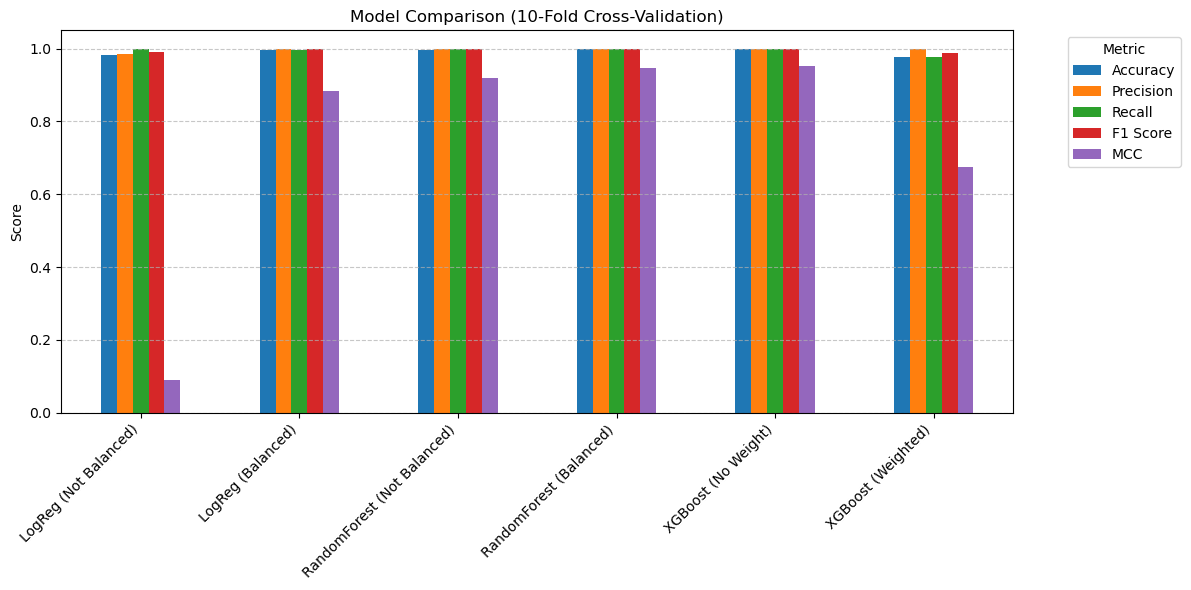

In [33]:
# Transposing table so each row becomes a model
comparison_plot = comparison_all.set_index('Metric').T

# Plot
comparison_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison (10-Fold Cross-Validation)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
# Trying out SMOTE to see how results may vary

#Step 1
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [35]:
# Step 2: Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 3: Train model on resampled training data
log_smote = LogisticRegression(max_iter=1000)
log_smote.fit(X_train_sm, y_train_sm)

# Step 4: Evaluate on untouched test set
y_pred_sm = log_smote.predict(X_test)

# Step 5: Metrics
print("Logistic Regression with SMOTE (Train/Test Split)")
print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_sm))
print("MCC:", matthews_corrcoef(y_test, y_pred_sm))

Logistic Regression with SMOTE (Train/Test Split)
Accuracy: 0.9941747572815534
Confusion Matrix:
 [[  15    1]
 [   5 1009]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       1.00      1.00      1.00      1014

    accuracy                           0.99      1030
   macro avg       0.87      0.97      0.92      1030
weighted avg       1.00      0.99      0.99      1030

MCC: 0.8357651820165555


In [36]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=5000))
])

results_smote_cv = cross_validate(pipeline, X_encoded, y, cv=10, scoring=scoring)

# Compile into DataFrame
comparison_smote_cv = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'LogReg (SMOTE - CV)': [
        results_smote_cv['test_accuracy'].mean(),
        results_smote_cv['test_precision'].mean(),
        results_smote_cv['test_recall'].mean(),
        results_smote_cv['test_f1'].mean(),
        results_smote_cv['test_mcc'].mean()
    ]
})

comparison_smote_cv

,Metric,LogReg (SMOTE - CV)
0,Accuracy,0.995142
1,Precision,0.999803
2,Recall,0.995257
3,F1 Score,0.997521
4,MCC,0.883989


In [37]:
# Trying out Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']  # Keep this to handle imbalance
}

In [39]:
rf_model = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=30,  # adjust for speed vs coverage
    cv=5,
    scoring='f1',  # or 'mcc' if you're focusing on correlation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [40]:
#Fit the Search

rf_random_search.fit(X_encoded, y)

#Best Estimator & Evaluation

best_rf = rf_random_search.best_estimator_
print("Best parameters:", rf_random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'class_weight': 'balanced'}


In [41]:
# Fit best model
best_rf.fit(X_train, y_train)

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))

Accuracy: 0.9990291262135922
Confusion Matrix:
 [[  16    0]
 [   1 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00      1014

    accuracy                           1.00      1030
   macro avg       0.97      1.00      0.98      1030
weighted avg       1.00      1.00      1.00      1030

MCC: 0.9696640081309497


In [42]:
rf_cv_results = cross_validate(best_rf, X_encoded, y, cv=10, scoring=scoring)

rf_cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'RandomForest (Tuned)': [
        rf_cv_results['test_accuracy'].mean(),
        rf_cv_results['test_precision'].mean(),
        rf_cv_results['test_recall'].mean(),
        rf_cv_results['test_f1'].mean(),
        rf_cv_results['test_mcc'].mean()
    ]
})

rf_cv_summary

,Metric,RandomForest (Tuned)
0,Accuracy,0.999806
1,Precision,1.000000
2,Recall,0.999802
3,F1 Score,0.999901
4,MCC,0.994775


In [43]:
# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [0.02, 0.05, 0.1]  # for class imbalance (neg/pos ~ 0.02 in this case)
}

In [44]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42) 
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

#This is here for a reason

In [45]:
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=30,               # number of random combinations to try
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [46]:
xgb_random_search.fit(X_encoded, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'scale_pos_weight': [0.02, 0.05, 0.1],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [47]:
# Fit best XGBoost model
best_xgb = xgb_random_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))

Accuracy: 0.9951456310679612
Confusion Matrix:
 [[  14    2]
 [   3 1011]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       1.00      1.00      1.00      1014

    accuracy                           1.00      1030
   macro avg       0.91      0.94      0.92      1030
weighted avg       1.00      1.00      1.00      1030

MCC: 0.8464219143038423


In [48]:
best_xgb = xgb_random_search.best_estimator_

xgb_cv_results = cross_validate(best_xgb, X_encoded, y, cv=10, scoring=scoring)

xgb_cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'XGBoost (Tuned)': [
        xgb_cv_results['test_accuracy'].mean(),
        xgb_cv_results['test_precision'].mean(),
        xgb_cv_results['test_recall'].mean(),
        xgb_cv_results['test_f1'].mean(),
        xgb_cv_results['test_mcc'].mean()
    ]
})

xgb_cv_summary

,Metric,XGBoost (Tuned)
0,Accuracy,0.994559
1,Precision,0.998817
2,Recall,0.995652
3,F1 Score,0.997225
4,MCC,0.864169


In [49]:
# Comparison table for all models
model_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'LogReg (SMOTE - CV)':     [0.995142, 0.999803, 0.995257, 0.997521, 0.883989],
    'RandomForest (Tuned)':    [0.999806, 1.000000, 0.999802, 0.999901, 0.994775],
    'XGBoost (Tuned)':         [0.994559, 0.998817, 0.995652, 0.997225, 0.864169]
})

# Display the table
model_comparison

,Metric,LogReg (SMOTE - CV),RandomForest (Tuned),XGBoost (Tuned)
0,Accuracy,0.995142,0.999806,0.994559
1,Precision,0.999803,1.000000,0.998817
2,Recall,0.995257,0.999802,0.995652
3,F1 Score,0.997521,0.999901,0.997225
4,MCC,0.883989,0.994775,0.864169


In [50]:
model_comparison_rounded = model_comparison.copy()
model_comparison_rounded.iloc[:, 1:] = model_comparison_rounded.iloc[:, 1:].round(4)
model_comparison_rounded

,Metric,LogReg (SMOTE - CV),RandomForest (Tuned),XGBoost (Tuned)
0,Accuracy,0.9951,0.9998,0.9946
1,Precision,0.9998,1.0000,0.9988
2,Recall,0.9953,0.9998,0.9957
3,F1 Score,0.9975,0.9999,0.9972
4,MCC,0.8840,0.9948,0.8642


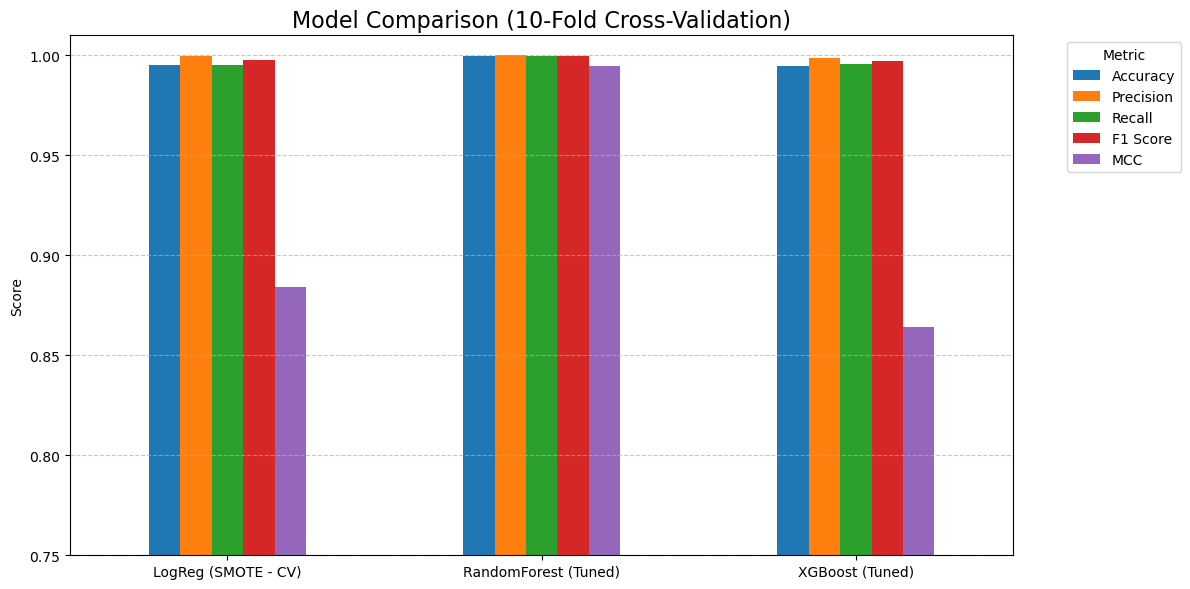

In [51]:
# Transpose the DataFrame for easier plotting
plot_df = model_comparison.set_index('Metric').T

# Create bar chart
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison (10-Fold Cross-Validation)', fontsize=16)
plt.ylabel('Score')
plt.ylim(0.75, 1.01)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
comparison_nn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    
    'LogReg (Balanced)': [
        0.994949,  
        0.999803,
        0.995059,
        0.997420,
        0.883643
    ],

    'LogReg (Smote)': [
        0.995142,
        0.999803,
        0.995257,
        0.997521,
        0.883989
    ],
    
    'RandomForest (Balanced)': [
        0.998251,  
        0.999016,
        0.999209,
        0.999111,
        0.946127
    ],

    'Random Forest (Tuned)': [
        0.999806,
        1.000000,
        0.999802,
        0.999901,
        0.994775
    ],

    'XGBoost (Weighted)': [
        0.976289,
        1.000000,
        0.975889,
        0.987718,
        0.675183
    ],

    'XGBoost (Tuned)': [
        0.994559,
        0.998817,
        0.995652,
        0.997225,
        0.864169
    ]
})

comparison_nn

,Metric,LogReg (Balanced),LogReg (Smote),RandomForest (Balanced),Random Forest (Tuned),XGBoost (Weighted),XGBoost (Tuned)
0,Accuracy,0.994949,0.995142,0.998251,0.999806,0.976289,0.994559
1,Precision,0.999803,0.999803,0.999016,1.000000,1.000000,0.998817
2,Recall,0.995059,0.995257,0.999209,0.999802,0.975889,0.995652
3,F1 Score,0.997420,0.997521,0.999111,0.999901,0.987718,0.997225
4,MCC,0.883643,0.883989,0.946127,0.994775,0.675183,0.864169


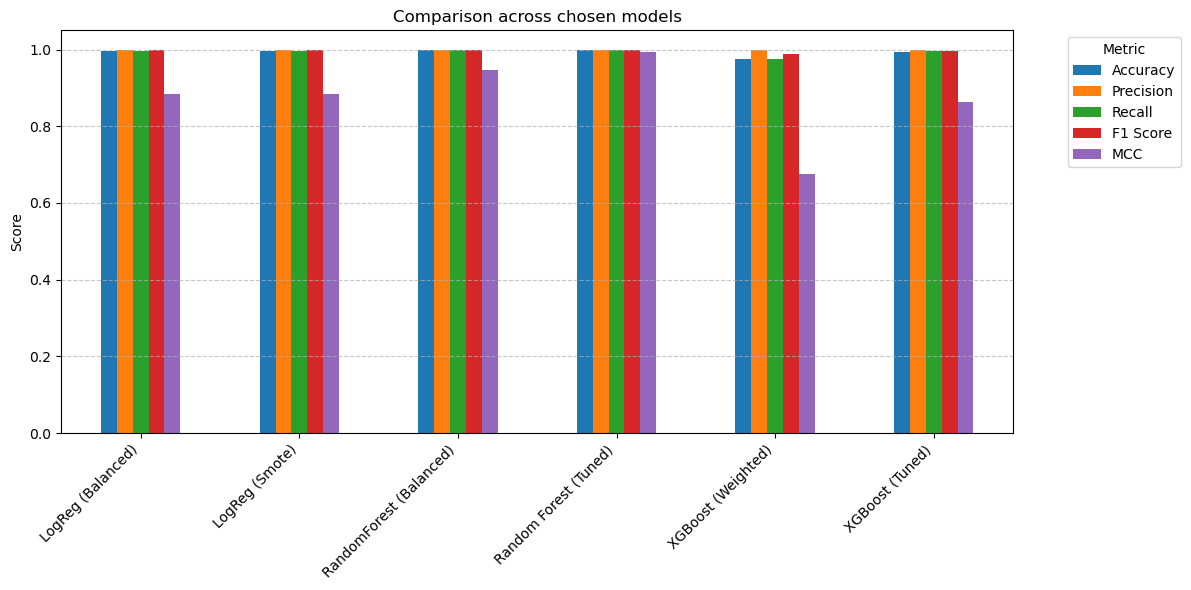

In [53]:
# Transposing table so each row becomes a model
comparison_plot = comparison_nn.set_index('Metric').T

# Plot
comparison_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison across chosen models')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

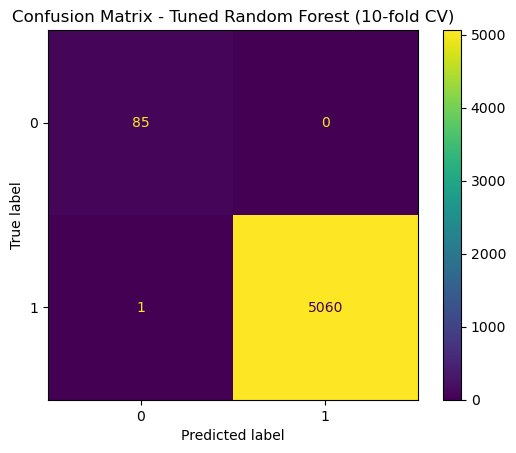

In [56]:
# Step 1: Initialise
y_true_all = []
y_pred_all = []

skf = StratifiedKFold(n_splits=10)

# Step 2: Loop over folds
for train_idx, test_idx in skf.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Tuned Random Forest (10-fold CV)")
plt.show()

In [57]:
cm = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  85    0]
 [   1 5060]]


In [58]:
# Tuned RF importances
rf_tuned_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'RF (Tuned)': best_rf.feature_importances_
})
rf_tuned_importance.head(10)

,Feature,RF (Tuned)
0,Covered by health insurance,9.616319e-01
1,Own a mobile phone,4.158660e-03
2,Ever given birth,0.000000e+00
3,Ever had child who later died,5.334406e-03
4,Blood pressure,5.432007e-04
5,Education,3.419091e-03
6,Place of delivery (recode)_Home,4.818760e-03
7,Place of delivery (recode)_Private health faci...,4.213989e-05
8,Place of delivery (recode)_Public health facility,9.508674e-05
9,Place of delivery (recode)_Unknown,4.343718e-18


In [59]:
#Geospatial analysis

# Load the Nigeria states GeoJSON
gdf = gpd.read_file(R"C:\Users\w2087133\Downloads\ng.json") 

In [60]:
zone_map = {
    # North Central
    'Benue': 'North Central',
    'Kogi': 'North Central',
    'Kwara': 'North Central',
    'Nasarawa': 'North Central',
    'Niger': 'North Central',
    'Plateau': 'North Central',
    'Federal Capital Territory': 'North Central',

    # North East
    'Adamawa': 'North East',
    'Bauchi': 'North East',
    'Borno': 'North East',
    'Gombe': 'North East',
    'Taraba': 'North East',
    'Yobe': 'North East',

    # North West
    'Jigawa': 'North West',
    'Kaduna': 'North West',
    'Kano': 'North West',
    'Katsina': 'North West',
    'Kebbi': 'North West',
    'Sokoto': 'North West',
    'Zamfara': 'North West',

    # South East
    'Abia': 'South East',
    'Anambra': 'South East',
    'Ebonyi': 'South East',
    'Enugu': 'South East',
    'Imo': 'South East',

    # South South
    'Akwa Ibom': 'South South',
    'Bayelsa': 'South South',
    'Cross River': 'South South',
    'Delta': 'South South',
    'Edo': 'South South',
    'Rivers': 'South South',

    # South West
    'Ekiti': 'South West',
    'Lagos': 'South West',
    'Ogun': 'South West',
    'Ondo': 'South West',
    'Osun': 'South West',
    'Oyo': 'South West'
}

In [61]:
gdf.columns

Index(['source', 'id', 'name', 'geometry'], dtype='object')

In [62]:
# Map zones onto GeoDataFrame
gdf['Zone'] = gdf['name'].map(zone_map)

In [63]:
# Dissolve states into zones
zones_gdf = gdf.dissolve(by='Zone', as_index=False)

In [64]:
# Calculating Risk Rate by Zone in this Dataset

zone_risk = df.groupby('Geopolitical zone (recode)')['high_risk'].mean().reset_index()
zone_risk.columns = ['Zone', 'HighRiskRate']

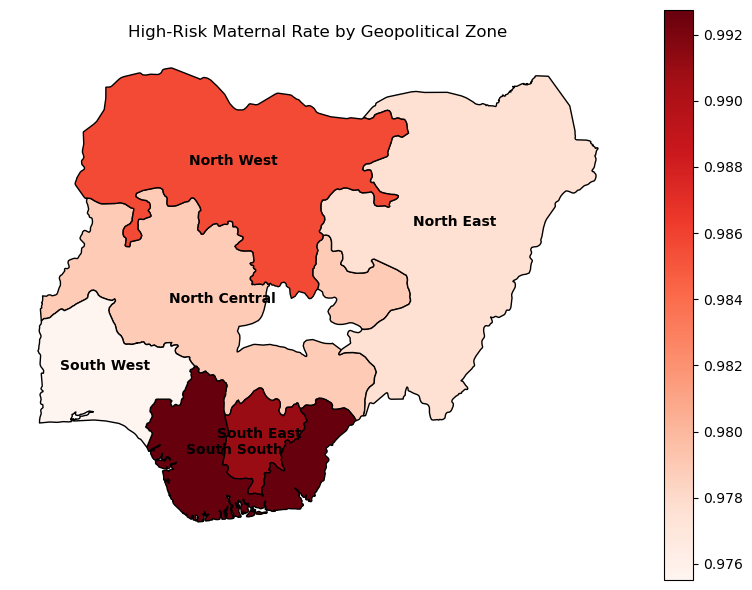

In [65]:
# Merge risk rates with zone geometries
merged = zones_gdf.merge(zone_risk, on='Zone')

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the map
merged.plot(column='HighRiskRate', cmap='Reds', legend=True, edgecolor='black', ax=ax)

# Add labels for each zone
for idx, row in merged.iterrows():
    plt.annotate(
        text=row['Zone'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title("High-Risk Maternal Rate by Geopolitical Zone")
plt.axis('off')
plt.tight_layout()
plt.show()

In [66]:
#Mapping selected variables to zones
# Group by geopolitical zone
zone_group = df.groupby('Geopolitical zone (recode)')

# Compute averages or percentages
summary = zone_group.agg({
    'high_risk': 'mean',
    'Education': 'mean',
    'Own a mobile phone': 'mean',
    'Covered by health insurance': 'mean',
    'Blood pressure': 'mean',
    'Received prenatal care': 'mean',
    'Ever had child who later died': 'mean',
    'Place of delivery (recode)': lambda x: (x == 'Home').mean()
})

# Multiply percentage columns by 100
summary[['high_risk', 'Own a mobile phone', 'Covered by health insurance', 'Blood pressure',
         'Received prenatal care', 'Ever had child who later died', 'Place of delivery (recode)']] *= 100

# Rename to home
summary = summary.rename(columns={'Place of delivery (recode)': 'Delivered at Home (%)'})

# Round for readability
summary = summary.round(2)

# Display the result
summary

,high_risk,Education,Own a mobile phone,Covered by health insurance,Blood pressure,Received prenatal care,Ever had child who later died,Delivered at Home (%)
Geopolitical zone (recode),,,,,,,,
North Central,97.89,2.58,67.86,8.42,95.97,100.0,15.11,17.95
North East,97.76,2.39,64.35,7.08,96.77,100.0,19.63,29.44
North West,98.56,2.09,55.44,10.75,95.02,100.0,31.06,58.19
South East,99.09,2.67,74.97,3.62,97.62,100.0,16.19,7.13
South South,99.27,2.65,67.11,3.63,90.21,100.0,22.85,13.42
South West,97.55,2.80,83.89,7.47,96.13,100.0,13.02,5.67


In [67]:
# Pick a row from your data (e.g., row 0)
sample = X_encoded.iloc[0].copy()

# Predict original risk
original_prediction = best_rf.predict([sample])[0]

# Let's simulate giving insurance
sample_modified = sample.copy()
sample_modified['Covered by health insurance'] = 1

# Predict again
new_prediction = best_rf.predict([sample_modified])[0]

# Show result
print(f"Original Prediction: {original_prediction}")
print(f"After adding insurance: {new_prediction}")


Original Prediction: 1
After adding insurance: 0


C:\UoW_Apps\anaconda3\envs\thesis_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\UoW_Apps\anaconda3\envs\thesis_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
# 1. Copy your feature data
X_sim = X_encoded.copy()

# 2. Predict original risk scores
original_prediction = best_rf.predict(X_sim)

# 3. Modify a feature (simulate everyone getting insurance)
X_modified = X_sim.copy()
X_modified['Covered by health insurance'] = 1

# 4. Predict again
modified_prediction = best_rf.predict(X_modified)

# 5. Compare predictions
change_df = pd.DataFrame({
    'Original': original_prediction,
    'Modified': modified_prediction
})
change_df['Changed'] = change_df['Original'] != change_df['Modified']

# 6. Summary
total_changed = change_df['Changed'].sum()
percentage_changed = 100 * total_changed / len(change_df)

print(f"Number of prediction changes after adding insurance: {total_changed}")
print(f"Percentage of changed predictions: {percentage_changed:.2f}%")

Number of prediction changes after adding insurance: 1462
Percentage of changed predictions: 28.41%


In [69]:
# Simulate public delivery
X_copy = X_encoded.copy()
original_preds = best_rf.predict(X_copy)

X_copy_modified = X_copy.copy()
# Set delivery dummies
X_copy_modified['Place of delivery (recode)_Public health facility'] = 1
X_copy_modified['Place of delivery (recode)_Home'] = 0
X_copy_modified['Place of delivery (recode)_Private health facility'] = 0

# Predict with modified data
new_preds = best_rf.predict(X_copy_modified)

# Compare predictions
change_df = pd.DataFrame({'Original': original_preds, 'Modified': new_preds})
change_df['Changed'] = change_df['Original'] != change_df['Modified']

# Summary
total_changed = change_df['Changed'].sum()
percentage_changed = 100 * total_changed / len(change_df)

print(f"Number of prediction changes after changing place of delivery:{total_changed}")
print(f"Percentage of changed prediction: {percentage_changed:.2f}%")

Number of prediction changes after changing place of delivery:12
Percentage of changed prediction: 0.23%


In [70]:
# Simulate scenario where no woman had previously lost a child
X_copy = X_encoded.copy()
original_preds = best_rf.predict(X_copy)

X_copy_modified = X_copy.copy()
X_copy_modified['Ever had child who later died'] = 0  # Simulate improved outcome

# Predict with modified data
new_preds = best_rf.predict(X_copy_modified)

# Compare predictions
change_df = pd.DataFrame({'Original': original_preds, 'Modified': new_preds})
change_df['Changed'] = change_df['Original'] != change_df['Modified']

# Summary statistics
total_changed = change_df['Changed'].sum()
percentage_changed = 100 * total_changed / len(change_df)

# Print in your preferred format
print(f"Number of prediction changes after removing history of child death: {total_changed}")
print(f"Percentage of changed predictions: {percentage_changed:.2f}%")

Number of prediction changes after removing history of child death: 11
Percentage of changed predictions: 0.21%


In [71]:
# Make a copy of the original features
X_combined = X_encoded.copy()
original_preds = best_rf.predict(X_combined)

# Apply all three changes:
# Insurance
X_combined['Covered by health insurance'] = 1

# Place of delivery: set Public = 1, others = 0
X_combined['Place of delivery (recode)_Public health facility'] = 1
X_combined['Place of delivery (recode)_Home'] = 0
X_combined['Place of delivery (recode)_Private health facility'] = 0

# No history of child death
X_combined['Ever had child who later died'] = 0

# Predict new values
new_preds_combined = best_rf.predict(X_combined)

# Compare predictions
combined_df = pd.DataFrame({'Original': original_preds, 'Modified': new_preds_combined})
combined_df['Changed'] = combined_df['Original'] != combined_df['Modified']

# Summary
total_changed = combined_df['Changed'].sum()
percentage_changed = 100 * combined_df['Changed'].mean()

print(f"Number of prediction changes after combined intervention: {total_changed}")
print(f"Percentage of changed predictions: {percentage_changed:.2f}%")

Number of prediction changes after combined intervention: 1906
Percentage of changed predictions: 37.04%


In [72]:
results = {
    'Scenario': ['Insurance Coverage', 'Public Delivery', 'No Child Death History', 'Combined Intervention'],
    'Count Changed': [1462, 12, 11, 1906],
    'Percent Changed': [28.41, 0.23, 0.21, 37.04]
}

# Create DataFrame
intervention_df = pd.DataFrame(results)

# Display it
print(intervention_df)

                 Scenario  Count Changed  Percent Changed
0      Insurance Coverage           1462            28.41
1         Public Delivery             12             0.23
2  No Child Death History             11             0.21
3   Combined Intervention           1906            37.04


In [73]:
from IPython.display import display

display(intervention_df.style.format({'Percent Changed': '{:.2f}%'}))

,Scenario,Count Changed,Percent Changed
0,Insurance Coverage,1462,28.41%
1,Public Delivery,12,0.23%
2,No Child Death History,11,0.21%
3,Combined Intervention,1906,37.04%


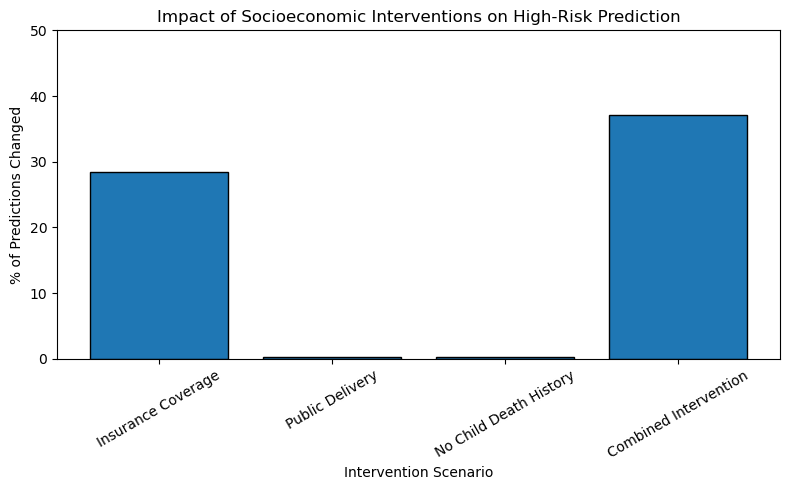

In [74]:
# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(results['Scenario'], results['Percent Changed'], edgecolor='black')
plt.title('Impact of Socioeconomic Interventions on High-Risk Prediction')
plt.ylabel('% of Predictions Changed')
plt.xlabel('Intervention Scenario')
plt.ylim(0, 50)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [75]:
# Step 1: Dataset copy
df_with_region = X_encoded.copy()
df_with_region['region'] = df['Geopolitical zone (recode)']  

# Step 2: Get original predicted risk per region
df_with_region['pred_original'] = best_rf.predict(df_with_region.drop('region', axis=1))

# Step 3: Simulate intervention - give everyone insurance
df_modified = df_with_region.copy()
df_modified['Covered by health insurance'] = 1
df_modified['pred_modified'] = best_rf.predict(df_modified.drop(['region', 'pred_original'], axis=1))

# Step 4: Compare average predictions
comparison_by_region = df_modified.groupby('region')[['pred_original', 'pred_modified']].mean().reset_index()
comparison_by_region['Change in risk'] = comparison_by_region['pred_original'] - comparison_by_region['pred_modified']

comparison_by_region

,region,pred_original,pred_modified,Change in risk
0,North Central,0.978938,0.694139,0.284799
1,North East,0.977640,0.751553,0.226087
2,North West,0.984273,0.863696,0.120577
3,South East,0.990940,0.622877,0.368063
4,South South,0.992745,0.698912,0.293833
5,South West,0.975515,0.577320,0.398196


In [76]:
comparison_by_region_percent = comparison_by_region.copy()

# Multiply all float columns by 100
for col in comparison_by_region_percent.select_dtypes(include='float'):
    comparison_by_region_percent[col] *= 100

# Round for readability
comparison_by_region_percent = comparison_by_region_percent.round(2)

display(comparison_by_region_percent)

,region,pred_original,pred_modified,Change in risk
0,North Central,97.89,69.41,28.48
1,North East,97.76,75.16,22.61
2,North West,98.43,86.37,12.06
3,South East,99.09,62.29,36.81
4,South South,99.27,69.89,29.38
5,South West,97.55,57.73,39.82


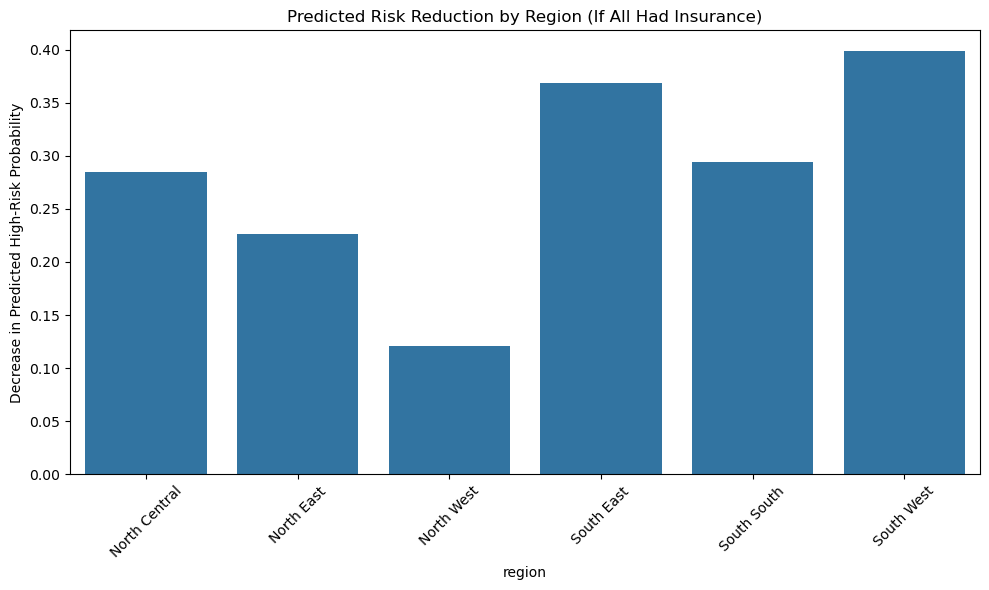

In [77]:
# Show result
plt.figure(figsize=(10,6))
sns.barplot(data=comparison_by_region, x='region', y='Change in risk')
plt.title('Predicted Risk Reduction by Region (If All Had Insurance)')
plt.ylabel('Decrease in Predicted High-Risk Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# Filter rows by geopolitical zone
zone_filter = df['Geopolitical zone (recode)'] == 'South East'
X_zone = X_encoded[zone_filter]

# Predict original
original_zone_preds = best_rf.predict(X_zone)

# Apply intervention (e.g., insurance only)
X_zone_modified = X_zone.copy()
X_zone_modified['Covered by health insurance'] = 1

# Predict new
new_zone_preds = best_rf.predict(X_zone_modified)

# Compare
zone_change_df = pd.DataFrame({'Original': original_zone_preds, 'Modified': new_zone_preds})
zone_change_df['Changed'] = zone_change_df['Original'] != zone_change_df['Modified']

# Summary
zone_total_changed = zone_change_df['Changed'].sum()
zone_percent_changed = 100 * zone_change_df['Changed'].mean()

print("Zone: South East")
print(f"Number of prediction changes: {zone_total_changed}")
print(f"Percentage of changed predictions: {zone_percent_changed:.2f}%")

Zone: South East
Number of prediction changes: 325
Percentage of changed predictions: 36.81%


In [79]:
# Filter rows by geopolitical zone
zone_filter = df['Geopolitical zone (recode)'] == 'North East'
X_zone = X_encoded[zone_filter]

# Predict original
original_zone_preds = best_rf.predict(X_zone)

# Apply intervention (e.g., insurance only)
X_zone_modified = X_zone.copy()
X_zone_modified['Covered by health insurance'] = 1

# Predict new
new_zone_preds = best_rf.predict(X_zone_modified)

# Compare
zone_change_df = pd.DataFrame({'Original': original_zone_preds, 'Modified': new_zone_preds})
zone_change_df['Changed'] = zone_change_df['Original'] != zone_change_df['Modified']

# Summary
zone_total_changed = zone_change_df['Changed'].sum()
zone_percent_changed = 100 * zone_change_df['Changed'].mean()

print("Zone: North East")
print(f"Number of prediction changes: {zone_total_changed}")
print(f"Percentage of changed predictions: {zone_percent_changed:.2f}%")

Zone: North East
Number of prediction changes: 182
Percentage of changed predictions: 22.61%


In [80]:
# Step 1: Create a copy to preserve the original encoded features
X_copy = X_encoded.copy()

# Step 2: Add geopolitical zone information to the copy
X_copy['Zone'] = df['Geopolitical zone (recode)'].values

# Step 3: Get original predictions before intervention
original_preds = best_rf.predict(X_copy.drop(columns='Zone'))

# Wrap predictions in a Series for indexing
original_preds_series = pd.Series(original_preds, index=X_copy.index)

# Step 4: Store results for each region
results = []

# Step 5: Loop through each unique zone
for zone in X_copy['Zone'].unique():
    # Filter data for the current zone
    zone_data = X_copy[X_copy['Zone'] == zone].copy()
    n_samples = len(zone_data)

    # Get the corresponding original predictions using .loc
    original_zone_preds = original_preds_series.loc[zone_data.index]

    # Apply the intervention (simulate everyone having insurance)
    zone_data['Covered by health insurance'] = 1

    # Predict new outcomes
    new_zone_preds = best_rf.predict(zone_data.drop(columns='Zone'))

    # Compare predictions and count changes
    changed = (original_zone_preds != new_zone_preds).sum()
    percent_changed = 100 * changed / n_samples

    # Store results
    results.append({
        'Zone': zone,
        'Count Changed': changed,
        'Percent Changed': round(percent_changed, 2)
    })

# Step 6: Convert the results to a DataFrame
insurance_by_zone = pd.DataFrame(results)

# Step 7: Add a row for all zones combined
total_changed = insurance_by_zone['Count Changed'].sum()
total_samples = len(X_copy)
combined_percent = round(100 * total_changed / total_samples, 2)

# Use pd.concat instead of deprecated .append
combined_row = pd.DataFrame([{
    'Zone': 'All Zones (Combined)',
    'Count Changed': total_changed,
    'Percent Changed': combined_percent
}])

insurance_by_zone = pd.concat([insurance_by_zone, combined_row], ignore_index=True)

# Step 8: Display the result
display(insurance_by_zone)

,Zone,Count Changed,Percent Changed
0,South East,325,36.81
1,North East,182,22.61
2,South South,243,29.38
3,North Central,311,28.48
4,South West,309,39.82
5,North West,92,12.06
6,All Zones (Combined),1462,28.41


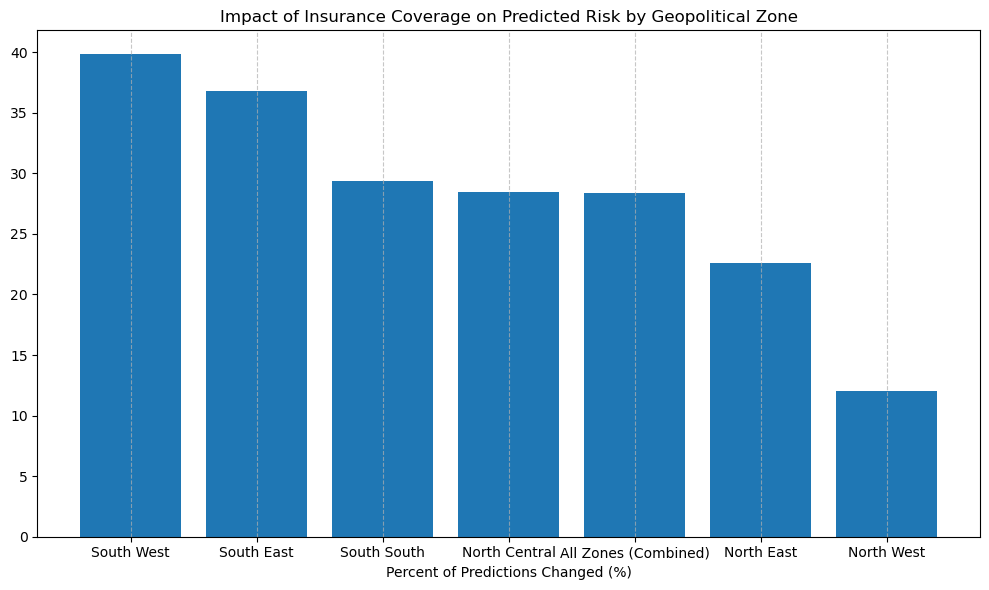

In [81]:
insurance_by_zone_sorted = insurance_by_zone.sort_values(by='Percent Changed', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    insurance_by_zone_sorted['Zone'],
    insurance_by_zone_sorted['Percent Changed']
)

plt.xlabel('Percent of Predictions Changed (%)')
plt.title('Impact of Insurance Coverage on Predicted Risk by Geopolitical Zone')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

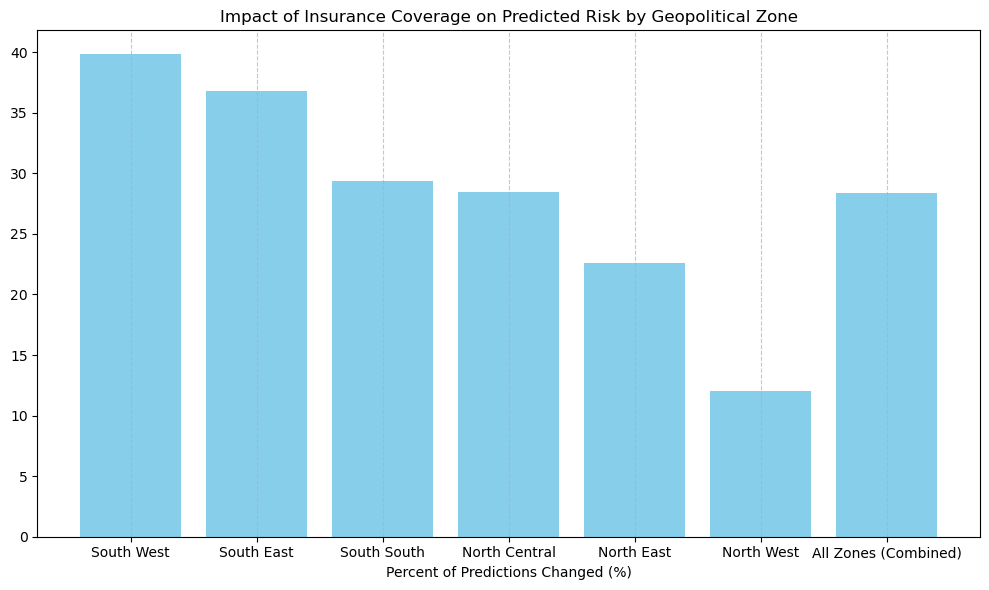

In [82]:
# Move 'All Zones (Combined)' to the bottom
zones_sorted = insurance_by_zone[insurance_by_zone['Zone'] != 'All Zones (Combined)']\
    .sort_values(by='Percent Changed', ascending=False)

combined_row = insurance_by_zone[insurance_by_zone['Zone'] == 'All Zones (Combined)']
insurance_by_zone_sorted = pd.concat([zones_sorted, combined_row])

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    insurance_by_zone_sorted['Zone'],
    insurance_by_zone_sorted['Percent Changed'],
    color='skyblue'
)

plt.xlabel('Percent of Predictions Changed (%)')
plt.title('Impact of Insurance Coverage on Predicted Risk by Geopolitical Zone')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()